# **Hands-On Machine Learning Project**
## **Topic 20: Credit Data**
### Florian Korn, Vincent Bläske, Dennis Götz

***
# **Table of Content**
**[IV. Data Preparation](#data_prep)**<br>
***

## **IV. Data Preparation** <a id='data_prep'></a>
**[1. Data Cleaning](#clean)**<br>
**[2. Feature Selection](#select)**<br>
**[3. Feature Scaling](#scale)**<br>
***

### **Import of librariers:**

In [59]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

### **Load stored data:**

In [60]:
%store -r attributes
%store -r cat_attribs
%store -r dict_ordinal_map
%store -r data_values
%store -r data_encoded
%store -r data_dummies
%store -r train_set
%store -r test_set
%store -r train_set_encoded
%store -r X_train
%store -r y_train
%store -r X_test
%store -r y_test
%store -r binary_attribs
%store -r onehot_attrbs

***
### **1. Data Cleaning** <a id='clean'></a> <br> 
Check for null values:

In [61]:
# Check for null values
is_null_check = pd.DataFrame(data_values.isnull().sum())
is_null_check[is_null_check[0] > 0]

,0


Encoding:

In [62]:
data_encoded = data_values.copy()
categories_order = [i for i in dict_ordinal_map.values()]
ordinal_encoder = OrdinalEncoder(categories=categories_order, dtype='int')
data_encoded[cat_attribs] = ordinal_encoder.fit_transform(data_values[cat_attribs])
data_encoded.head(3)

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Credit rating
0,1,6,4,3,1169,0,4,4,0,0,...,3,67,0,2,2,2,1,0,0,0
1,2,48,2,3,5951,1,2,2,3,0,...,3,22,0,2,1,2,1,1,0,1
2,0,12,4,6,2096,1,3,2,0,0,...,3,49,0,2,1,1,2,1,0,0


**[Back to IV. Data Preparation](#data_prep)**<br>

### **2. Feature Selection (analytical)** <a id='select'></a>
Decisions to include features for the model training were made based on the [Data_Understanding](./Data_Understanding.ipynb) feature analysis and correlation, as well as semantically meaningful interpretation and in terms of unbiased machine learning models. Some features are not that different in patterns by themselves, but can influence a model in combination with other features. Therefore, we have included them so that the machine learning models decide for themselves which features to include and which not to include.

* **Status of existing checking account**
    - **Include** this feature to train a model (and let the model decide)
        -  We see patterns in the data (see [Data_Understanding](./Data_Understanding.ipynb)) 
        - It has the secound highest correlation
    - Good credit ratings are seven times more likely to have no checking account with us
    - The categories <200 DM habe a high probability (<0 DM: 69 % and 0 - 200 DM: 60 %) to be marked as bad credit rating
    - Contrary to our thoughts it is not determining for the credit rating if we know the customer

* **Duration in month** <br>
    - **Include** this feature to train a model (and let the model decide)
        - we see differences between short and long durations (see [Data_Understanding](./Data_Understanding.ipynb))
        - A closer look at "credit amount" and "duration in month" reveal for some durations patterns, for others no big difference.<br>

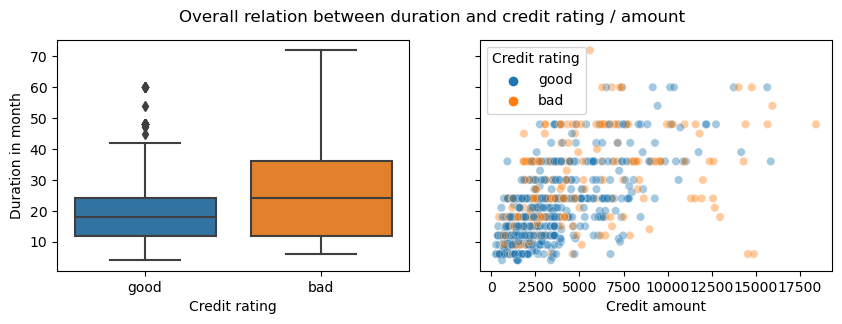

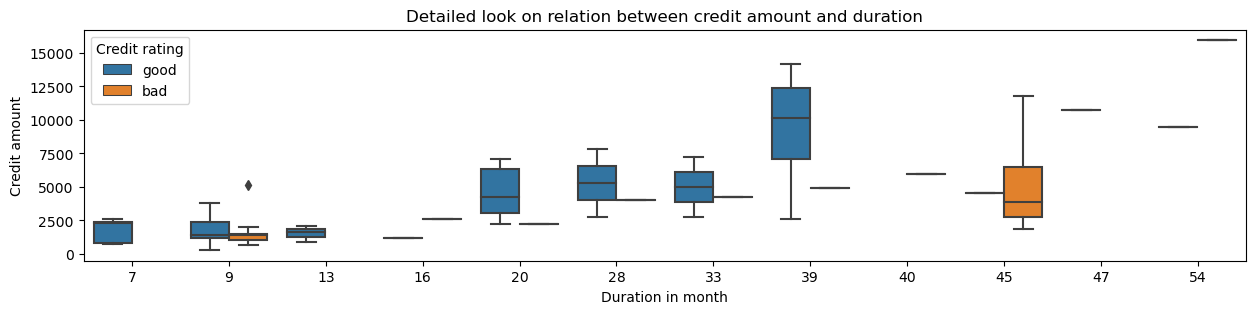

In [63]:
fig, ax = plt.subplots(1,2, figsize = (10,3), sharey = True)
fig.suptitle('Overall relation between duration and credit rating / amount')
sns.boxplot(ax = ax[0], x = data_values['Credit rating'], y = data_values['Duration in month'])
sns.scatterplot(ax = ax[1], x = data_values['Credit amount'], y = data_values['Duration in month'], hue = data_values['Credit rating'], alpha = 0.4)
plt.figure(figsize = (15,3))
sns.boxplot(data_values[data_values['Duration in month'].isin([7,9,13,16,20,39,33,40,45,54,47,28])], x = 'Duration in month', y = 'Credit amount', hue = 'Credit rating')
plt.title('Detailed look on relation between credit amount and duration')
plt.show()

* **Credit History** <br>
    - **Include** this feature to train a model (and let the model decide)
        - Differences between good and bad credit ratings in relation to credit history
        - Highest negative correlation between features
    - Good credit ratings have often existing credits or are a critical account
    - A equal likelihood for a good and bad credit is for existing credits paid back duly and dely in paying off
    - The worst likelihood for bad credit ratings has "no credits taken" and "all paid back dully"

* **Purpose** <br>
    - **Include** this feature to train a model (and let the model decide)
        - Systematic patterns as good credit ratings have often the purpose to retrain, buy a used car or radio / tv
    - Credits related to new cars get often a bad credit rating
    - A detailed look between the categories and credit amount reveal:
        - good credits had low credit amounts for radio / tv
        - bad credit ratings are loans for the purpose of education, car (used), business and others - we see that high amounts lead more likely to bad credit ratings

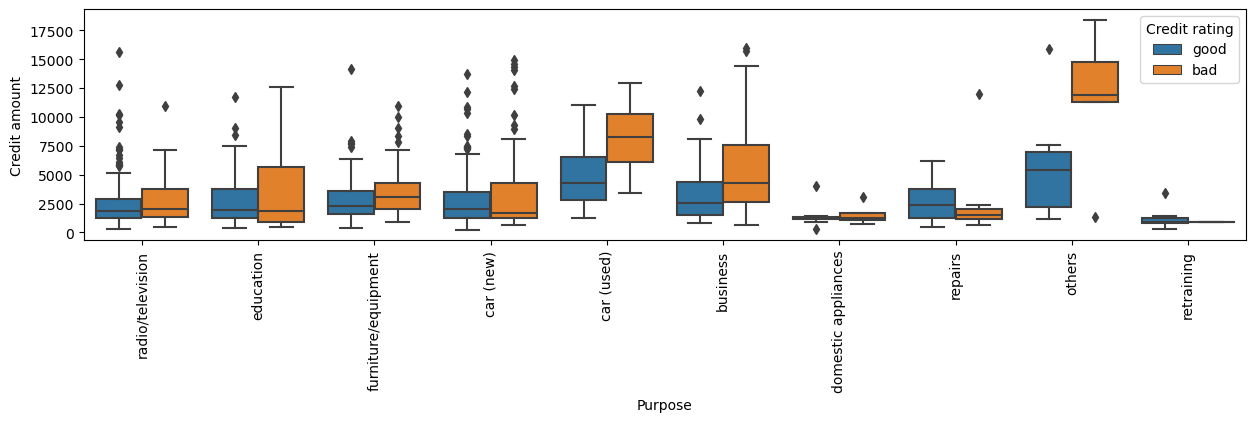

In [64]:
plt.figure(figsize = (15,3))
sns.boxplot(y = data_values['Credit amount'], x = data_values['Purpose'], hue = data_values['Credit rating']).set_xticklabels(data_values['Purpose'].unique(), rotation = 90)
plt.show()

* **Credit Amount** <br>
    - **Include** this feature to train a model (and let the model decide)
        - There is a slightly higher probability to get with a small credit amount a good credit rating
        - The feature has explanatory value in interaction with other features
        - Third highest positive correlation of all features

* **Savings account/bonds** <br>
    - **Include** this feature to train a model (and let the model decide)
        - Equal probabilities for a good and bad credit rating for 0 - 500 DM
        - High probability for a good credit rating for unknown / no savings and >500 DM
        

* **Present employment since** <br>
    - **Include** this feature to train a model (and let the model decide)
        - Systematic patterns and differs with other features to more specific insights
    - 1 - 4 years of employment has a high likelihood for good credit ratings
    - We also see in the group of bad credit ratings that 1 - 4 years of employment have often 0 - 100 DM savings

C:\Users\Dennis\AppData\Local\Temp\ipykernel_2776\2296859800.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns.histplot(data=data_values,


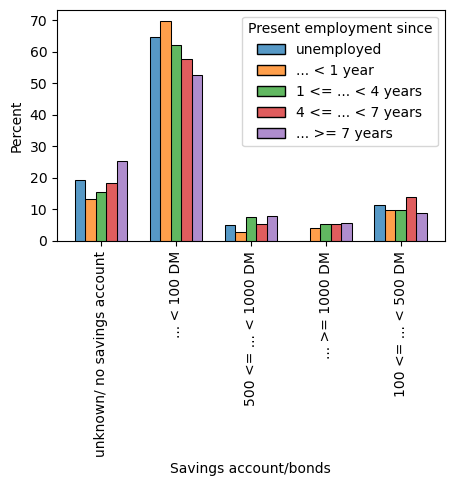

In [65]:
plt.figure(figsize = (5,3))
sns.histplot(data=data_values,
            hue="Present employment since",
            hue_order = dict_ordinal_map["Present employment since"],
            stat='percent',
            common_norm=False,
            shrink=0.7,
            discrete=True,
            x='Savings account/bonds',
            multiple='dodge').set_xticklabels(data_values['Savings account/bonds'].unique(), rotation = 90)
plt.show()

* **Installment rate in percentage of disposable income**
    - **Include** this feature to train a model (and let the model decide)
        - There is no pattern, good and bad credit ratings seem similar distributed
    - We would rather not include this feature, but there could be interaction effects with other features

* **Personal status and sex**
    - **Don't include** this feature
        - The category "female : single" is completly missing
        - The category "male : single" is overly representated as good credit rating regarding the data (could bias the ML model)
        - Categories seem differently in label consistency (male : divorced/seperated vs. female : divorced / separated / married)

* **Other debtors / guarantors**
    - **Include** this feature to train a model (and let the model decide)
        - There could be not enough explanatory value of this feature, as most data entries have no debtor / guarantors
    - Contrary to our believes, it is more likely to get a good credit rating if we don't have debtors / guarantors

* **Present residence since**
    - **Include** this feature to train a model (and let the model decide)
        - There is no pattern, good and bad credit ratings seem similar distributed
    - We would rather not include this feature, but there could be interaction effects with other features

* **Property**
    - **Include** this feature to train a model (and let the model decide)
        - Third lowest negative correlation with the target variable
    - There is a higher probability to get a bad credit rating if the status is "unknown / no property"
    - Car or other and building society / savings agreement / life insurance have the same probabilites for good or bad credit ratings

* **Age in years**
    - **Include** this feature to train a model (and let the model decide)
        - The distribution of the feature looks similar between good and bad credit rating
    - There is a slightly higher probability for young people to get a bad credit rating, than a good one

* **Other installment plans**
    - **Include** this feature to train a model (and let the model decide)
        - There is a high probability for a bad credit rating if there are other installment plans from stores or banks
        - But no other installment plans are overly represented in the data

* **Housing**
    - **Include** this feature to train a model (and let the model decide)
        - It has the secound lowest negative correlation with the target variable
        - We see patterns, as you have a higher likelihood of getting a bad credit rating if you live for free or rent

* **Number of existing credits at this bank**
    - **Include** this feature to train a model (and let the model decide)
        - There is no pattern, good and bad credit ratings seem similar distributed
    - We would rather not include this feature, but there could be interaction effects with other features

* **Job**
    - **Include** this feature to train a model (and let the model decide)
        - The likelihood for getting a good or bad credit rating is similar in each category
    - We would rather not include this feature, but there could be interaction effects with other features

* **Number of people being liable to provide maintenance for**
    - **Include** this feature to train a model (and let the model decide)
        - The likelihood for getting a good or bad credit rating is similar in each category
    - We would rather not include this feature, but there could be interaction effects with other features

* **Telephone**
    - **Include** this feature to train a model (and let the model decide)
        - The likelihood for getting a good or bad credit rating is similar in each category
    - We would rather not include this feature, but there could be interaction effects with other features

* **Foreign Worker**
    - **Don't include** this feature
        - Only a minority are not foreign workers
        - There is a higher likelihhod for a good credit rating if it isn't a foreign worker
        - We would bias here based on nationality / race, which shouldn't be done based on ethical reasoning

In [66]:
# Do feature selection based on analysis
features_to_drop = ['foreign worker', 'Personal status and sex']

# For the encoded data
data_list = [data_encoded, train_set, test_set, data_values, train_set_values]
for df in data_list: df.drop(features_to_drop, axis = 1, inplace=False)

# For the 1hot-encoded data
for feature in features_to_drop:
    if (feature in binary_attribs):
        data_dummies.drop(feature, axis = 1, inplace=True)
    else: data_dummies.drop([feature + '_' + column for column in pd.get_dummies(data_values[feature]).columns], axis=1, inplace=True)

# Recreate X_train, y_train, X_test, y_test
X_train = np.array(train_set.iloc[:, :-1])
y_train = np.array(train_set.iloc[:, -1])
X_test = np.array(test_set.iloc[:, :-1])
y_test = np.array(test_set.iloc[:, -1])

**[Back to IV. Data Preparation](#data_prep)**<br>

### **3. Feature Scaling** <a id='scale'></a> <br> 
Here the features are scaled with the StandardScaler of SciKit learn.

In [67]:
# This scaling is just for completness of the data preparation (the outcome dataframe isn't used afterwards as the scaling is done later in the pipelines)
X_train_encoded = train_set_encoded[train_set_encoded.columns[:-1]]

scaler = StandardScaler()
scaled_features = pd.DataFrame(scaler.fit_transform(X_train_encoded))
scaled_features.columns = data_encoded.iloc[:,:-1].columns
scaled_features.head(3)

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,Present residence since,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker
0,1.054399,0.257194,-0.480888,-1.094744,-0.721798,-0.214436,-1.153383,0.918837,-0.836774,-0.318072,-0.785979,1.285768,-1.084571,0.987629,0.58595,-0.712435,-1.386847,-0.411814,0.816497,-0.193942
1,0.003939,-0.743643,-0.480888,-1.094744,-0.846553,-1.241673,-0.321366,0.918837,-0.101956,-0.318072,-0.785979,-0.629715,-1.084571,-0.451539,0.58595,-0.712435,0.162703,-0.411814,0.816497,-0.193942
2,-1.046520,-1.244061,-0.480888,-1.094744,-0.928761,-0.214436,-1.985400,-1.757388,1.367680,-0.318072,1.033944,1.285768,1.618410,-0.451539,0.58595,-0.712435,-2.936397,-0.411814,-1.224745,-0.193942


In [68]:
# # Train/Test splits
# %store train_set
# %store test_set

# # Feature and target variable splits
# %store X_train
# %store y_train
# %store X_test
# %store y_test

# # Encoded dataset
# %store data_encoded
# %store data_dummies

# # Dictionarys
# %store cat_dict
# %store dict_ordinal_map

# # lists with features
# %store attributes
# %store num_attribs
# %store cat_attribs
# %store binary_attribs
# %store onehot_attrbs

**[Back to IV. Data Preparation](#data_prep)**<br>